In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

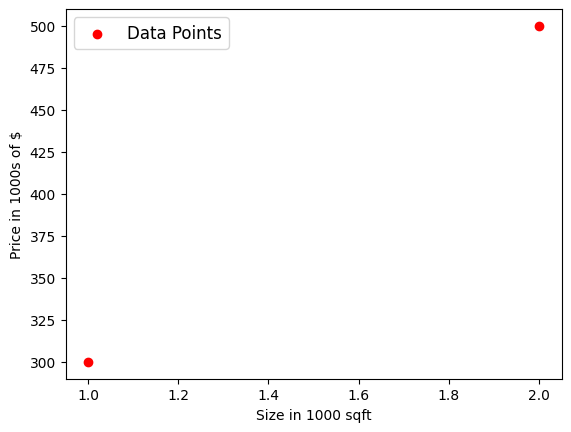

In [14]:
X_train = np.array([[1.0],[2.0]],dtype=np.float32)
Y_train = np.array([[300.0],[500.0]],dtype=np.float32)

fig,ax = plt.subplots(1,1)
ax.scatter(X_train,Y_train,c='r',marker = 'o', label='Data Points')
ax.legend(fontsize= 'large')
ax.set_ylabel('Price in 1000s of $')
ax.set_xlabel('Size in 1000 sqft')
plt.show()

In [18]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
linear_layer.get_weights()

[]

In [19]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[1.1701645]], shape=(1, 1), dtype=float32)


In [21]:
w,b = linear_layer.get_weights()
print(f"weight: {w} and biases: {b}")

weight: [[1.1701645]] and biases: [0.]


In [31]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [33]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


[]

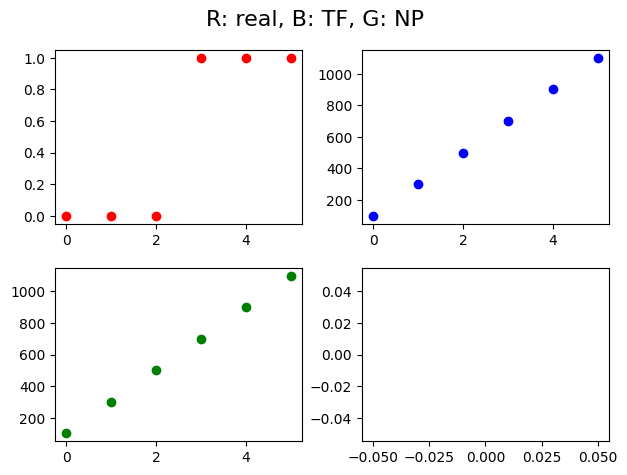

In [50]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train,set_w) + set_b
fig,ax = plt.subplots(2,2)
ax[0,0].scatter(X_train,Y_train,c = 'r')
ax[0,1].scatter(X_train,prediction_tf,c='b')
ax[1,0].scatter(X_train,prediction_np,c='g')

fig.suptitle('R: real, B: TF, G: NP', fontsize=16)
fig.tight_layout()
plt.plot()


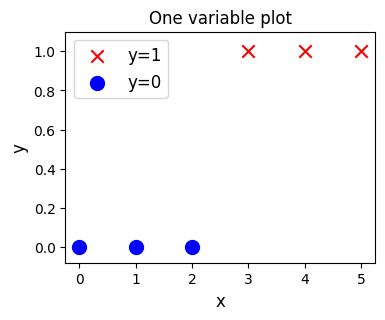

In [51]:
X_train = np.array([0.,1,2,3,4,5],dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,0,0,1,1,1],dtype=np.float32).reshape(-1,1)

pos = Y_train == 1
neg = Y_train == 0

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='r', label='y=1')
ax.scatter(X_train[neg],Y_train[neg],marker = 'o',s=100, c='b',label='y=0')

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y',fontsize=12)
ax.set_xlabel('x',fontsize=12)
ax.set_title('One variable plot')
ax.legend(fontsize=12)
plt.show()


In [54]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1,input_dim=1, activation='sigmoid',name='L1')
    ]
)

/Users/tristan/git/DeepLearningAI_courses/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.3115523]] [0.]
(1, 1) (1,)


In [59]:
set_w, set_b = np.array([[2]]),np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [60]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
a1 = model.predict(X_train[0].reshape(-1,1))
print(a1)
alog = sigmoid(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.01098694]]
[[0.01098694]]
